**Module 2 Cars Dataset EDA and Regression**

**Nosson Weissman**

**DAV 6150 - Data Science**

**Professor James Topor**

**Summer, 2022**

# DAV 6150 Module 2 Assignment

In [599]:
#laoding libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import urllib

## 1. Loading Data from Git ⏬

In [600]:
url = "https://raw.githubusercontent.com/codepharmer/AI-6150/main/imports-85.names"
file = urllib.request.urlopen(url)

headers = [line.decode("utf-8") for line in file]
headers

['1. Title: 1985 Auto Imports Database\n',
 '\n',
 '2. Source Information:\n',
 '   -- Creator/Donor: Jeffrey C. Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)\n',
 '   -- Date: 19 May 1987\n',
 '   -- Sources:\n',
 "     1) 1985 Model Import Car and Truck Specifications, 1985 Ward's\n",
 '        Automotive Yearbook.\n',
 '     2) Personal Auto Manuals, Insurance Services Office, 160 Water\n',
 '        Street, New York, NY 10038 \n',
 '     3) Insurance Collision Report, Insurance Institute for Highway\n',
 '        Safety, Watergate 600, Washington, DC 20037\n',
 '\n',
 '3. Past Usage:\n',
 '   -- Kibler,~D., Aha,~D.~W., \\& Albert,~M. (1989).  Instance-based prediction\n',
 '      of real-valued attributes.  {\\it Computational Intelligence}, {\\it 5},\n',
 '      51--57.\n',
 '\t -- Predicted price of car using all numeric and Boolean attributes\n',
 '\t -- Method: an instance-based learning (IBL) algorithm derived from a\n',
 '\t    localized k-nearest neighbor algorithm.  Compare

#### Extracting headers

In [601]:
temp_headers = headers[60:89]
cleaned_headers = []
for header in temp_headers:
    split_header = header.strip().split(' ')
    if len(split_header) > 3:
        cleaned_headers.append(split_header[1].strip()[:-1])
# here I'm getting rid of a few car-maker names which didn't belong
del cleaned_headers[3]
del cleaned_headers[3]
del cleaned_headers[3]
cleaned_headers

['symboling',
 'normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

## 2. Reading Data into Dataframe 📖

In [602]:
cars_df = pd.read_csv('https://raw.githubusercontent.com/codepharmer/AI-6150/main/imports-85.data')
#assign headers
cars_df.columns = cleaned_headers
cars_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


## 3. Data Cleansing 🧼

In [603]:
#keep the original in case we need it, but for now we'll focus on onlly specific features
cars_df_copy = cars_df[['height','curb-weight','width','length','wheel-base','engine-size','horsepower','peak-rpm','city-mpg']]

In [604]:
cars_df_copy.describe()

,height,curb-weight,width,length,wheel-base,engine-size,city-mpg
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,53.749020,2555.602941,65.916667,174.075000,98.806373,126.892157,25.240196
std,2.424901,521.960820,2.146716,12.362123,5.994144,41.744569,6.551513
min,47.800000,1488.000000,60.300000,141.100000,86.600000,61.000000,13.000000
25%,52.000000,2145.000000,64.075000,166.300000,94.500000,97.000000,19.000000
50%,54.100000,2414.000000,65.500000,173.200000,97.000000,119.500000,24.000000
75%,55.500000,2939.250000,66.900000,183.200000,102.400000,142.000000,30.000000
max,59.800000,4066.000000,72.300000,208.100000,120.900000,326.000000,49.000000


#### We can see that the describe method does not include a couple of columns, namely 'horsepwer' and 'peak-rpm'. Let's find out why

In [605]:
#finding uniqu entries for each column (we can see the data format too)
for col_name,col in cars_df_copy.transpose().iterrows():
    print(col_name,': ',col.unique())

height :  [48.8 52.4 54.3 53.1 55.7 55.9 52.0 53.7 56.3 53.2 50.8 50.6 59.8 50.2
 52.6 54.5 58.3 53.3 54.1 51.0 53.5 51.4 52.8 47.8 49.6 55.5 54.4 56.5
 58.7 54.9 56.7 55.4 54.8 49.4 51.6 54.7 55.1 56.1 49.7 56.0 50.5 55.2
 52.5 53.0 59.1 53.9 55.6 56.2 57.5]
curb-weight :  [2548 2823 2337 2824 2507 2844 2954 3086 3053 2395 2710 2765 3055 3230
 3380 3505 1488 1874 1909 1876 2128 1967 1989 2191 2535 2811 1713 1819
 1837 1940 1956 2010 2024 2236 2289 2304 2372 2465 2293 2734 4066 3950
 1890 1900 1905 1945 1950 2380 2385 2500 2410 2443 2425 2670 2700 3515
 3750 3495 3770 3740 3685 3900 3715 2910 1918 1944 2004 2145 2370 2328
 2833 2921 2926 2365 2405 2403 1889 2017 1938 1951 2028 1971 2037 2008
 2324 2302 3095 3296 3060 3071 3139 3020 3197 3430 3075 3252 3285 3485
 3130 2818 2778 2756 2800 3366 2579 2460 2658 2695 2707 2758 2808 2847
 2050 2120 2240 2190 2340 2510 2290 2455 2420 2650 1985 2040 2015 2280
 3110 2081 2109 2275 2094 2122 2140 2169 2204 2265 2300 2540 2536 2551
 2679 2714 2975

####  Below we can see that this column contains string values instead of numeric data

In [606]:
cars_df_copy['horsepower'] = pd.to_numeric(cars_df_copy['horsepower'])

ValueError: Unable to parse string "?" at position 129

In [607]:
cars_df_copy = cars_df_copy[cars_df_copy['horsepower'] != '?']
cars_df_copy['horsepower'] = pd.to_numeric(cars_df_copy['horsepower'])

In [608]:
cars_df_copy = cars_df_copy[cars_df_copy['peak-rpm'] != '?']
cars_df_copy['peak-rpm'] = pd.to_numeric(cars_df_copy['peak-rpm'])

In [609]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result
cars_df_copy = normalize(cars_df_copy)

## 4. Exploration 😊

In [610]:
cars_df_copy.describe()

,height,curb-weight,width,length,wheel-base,engine-size,horsepower,peak-rpm,city-mpg
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,0.496493,0.414259,0.467533,0.491414,0.356652,0.248459,0.234262,0.398363,0.340622
std,0.201997,0.203454,0.179702,0.185236,0.175445,0.158297,0.165876,0.196099,0.182783
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350000,0.254849,0.310417,0.376119,0.230321,0.135849,0.091667,0.265306,0.166667
50%,0.525000,0.358417,0.433333,0.479104,0.303207,0.203774,0.195833,0.428571,0.319444
75%,0.641667,0.566234,0.550000,0.631343,0.460641,0.313208,0.283333,0.551020,0.472222
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [611]:
cars_df_copy[cars_df_copy.isnull().any(axis=1)]
#it appears that we don't have any NANs in this df

,height,curb-weight,width,length,wheel-base,engine-size,horsepower,peak-rpm,city-mpg


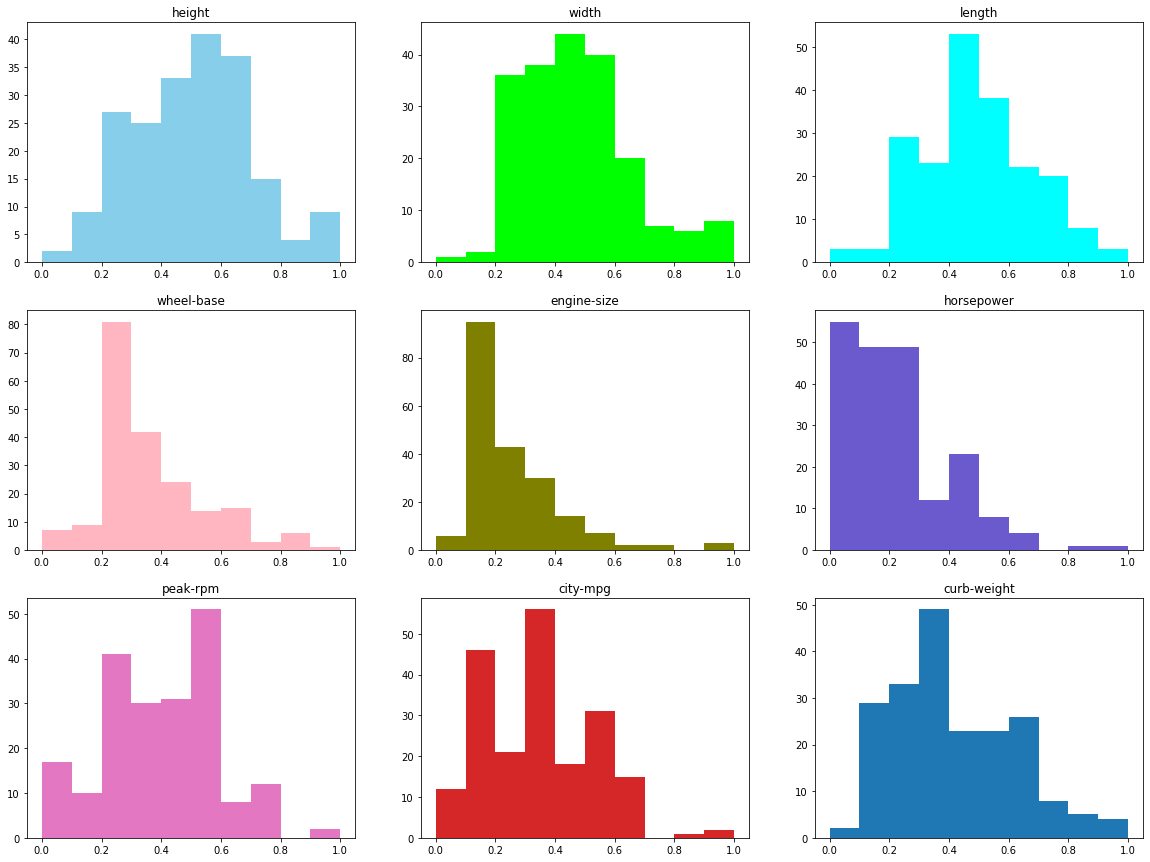

In [612]:
fig, axs  = plt.subplots(3,3,facecolor='white')
fig.set_size_inches(20,15)
axs[0,0].hist(cars_df_copy.height,color='skyblue')
axs[0,0].set_title('height')
axs[0,1].hist(cars_df_copy.width,color='lime')
axs[0,1].set_title('width')
axs[0,2].hist(cars_df_copy.length,color='cyan')
axs[0,2].set_title('length')
axs[1,0].hist(cars_df_copy['wheel-base'],color='lightpink')
axs[1,0].set_title('wheel-base')
axs[1,1].hist(cars_df_copy['engine-size'],color='olive')
axs[1,1].set_title('engine-size')
axs[1,2].hist(cars_df_copy['horsepower'],color='slateblue')
axs[1,2].set_title('horsepower')
axs[2,0].hist(cars_df_copy['peak-rpm'],color='tab:pink')
axs[2,0].set_title('peak-rpm')
axs[2,1].hist(cars_df_copy['city-mpg'],color='tab:red')
axs[2,1].set_title('city-mpg')
axs[2,2].hist(cars_df_copy['curb-weight'],color='tab:blue')
axs[2,2].set_title('curb-weight')
plt.show()

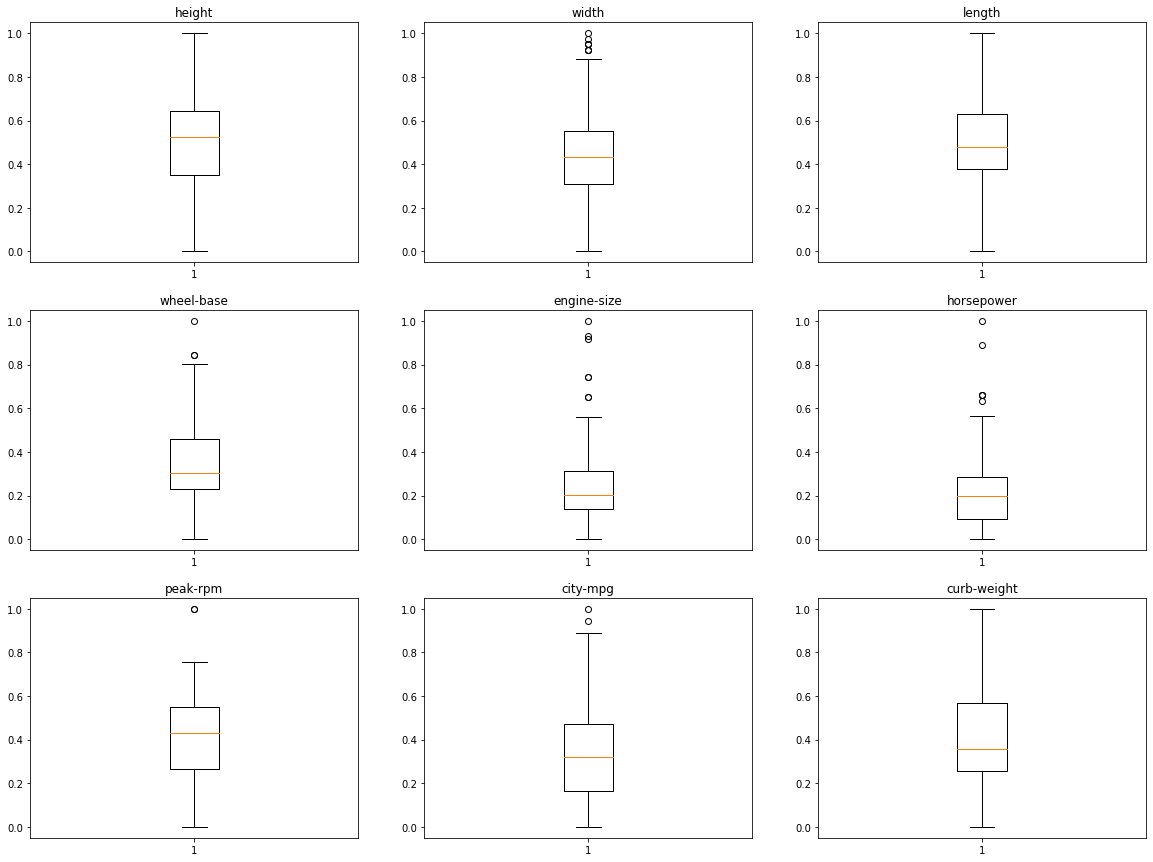

In [613]:
fig, axs  =plt.subplots(3,3)
fig.set_size_inches(20,15)
axs[0,0].boxplot(cars_df_copy.height)
axs[0,0].set_title('height')
axs[0,1].boxplot(cars_df_copy.width)
axs[0,1].set_title('width')
axs[0,2].boxplot(cars_df_copy.length)
axs[0,2].set_title('length')
axs[1,0].boxplot(cars_df_copy['wheel-base'])
axs[1,0].set_title('wheel-base')
axs[1,1].boxplot(cars_df_copy['engine-size'])
axs[1,1].set_title('engine-size')
axs[1,2].boxplot(cars_df_copy['horsepower'])
axs[1,2].set_title('horsepower')
axs[2,0].boxplot(cars_df_copy['peak-rpm'])
axs[2,0].set_title('peak-rpm')
axs[2,1].boxplot(cars_df_copy['city-mpg'])
axs[2,1].set_title('city-mpg')
axs[2,2].boxplot(cars_df_copy['curb-weight'])
axs[2,2].set_title('curb-weight')
plt.show()

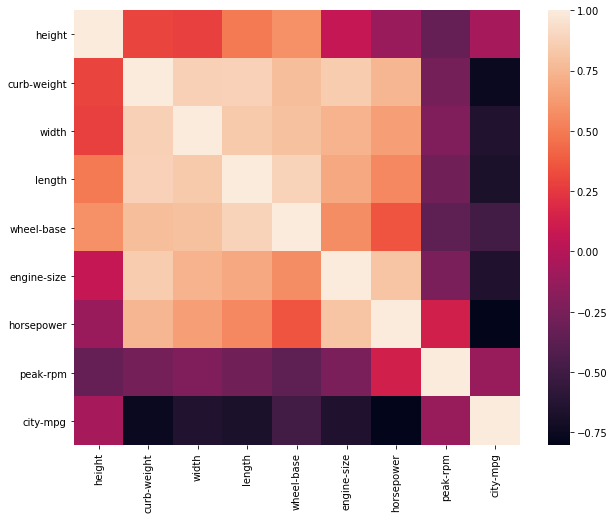

,height,curb-weight,width,length,wheel-base,engine-size,horsepower,peak-rpm,city-mpg
height,1.000000,0.298701,0.276980,0.494804,0.584641,0.069403,-0.110136,-0.328303,-0.057259
curb-weight,0.298701,1.000000,0.869177,0.879130,0.782315,0.850834,0.751101,-0.266372,-0.758981
width,0.276980,0.869177,1.000000,0.841259,0.797597,0.737059,0.644356,-0.221468,-0.646831
length,0.494804,0.879130,0.841259,1.000000,0.881246,0.684077,0.555641,-0.288046,-0.672929
wheel-base,0.584641,0.782315,0.797597,0.881246,1.000000,0.575165,0.356268,-0.365896,-0.481938
engine-size,0.069403,0.850834,0.737059,0.684077,0.575165,1.000000,0.810779,-0.244565,-0.654114
horsepower,-0.110136,0.751101,0.644356,0.555641,0.356268,0.810779,1.000000,0.131224,-0.803966
peak-rpm,-0.328303,-0.266372,-0.221468,-0.288046,-0.365896,-0.244565,0.131224,1.000000,-0.114766
city-mpg,-0.057259,-0.758981,-0.646831,-0.672929,-0.481938,-0.654114,-0.803966,-0.114766,1.000000


In [614]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cars_df_copy.corr(), 
        xticklabels=cars_df_copy.columns,
        yticklabels=cars_df_copy.columns)
plt.show()
cars_df_copy.corr()

<pre>
Looking at the above correlation matrix, we see some variables which show high correlation with curb-weight (both positive and negative correlations).

In the next steps we will be working on regression models and we will be focusing on some of these variables (or features).

Some variables worth mentioning include:
['city-mpg', 'width', 'length', 'peak-rpm', 'engine-size']

We will try a couple of combinations using these 5 variables
</pre>

## 5. Regression Warm-up ☀️
### Using engine-size for simple linear regression model

In [680]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [681]:
test_sizer = lambda x: int(len(x)*.8)

In [682]:
len(cars_df_copy['engine-size'][:test_sizer(cars_df_copy['engine-size'])])

161

In [683]:
train_end_index = test_sizer(cars_df_copy['engine-size'])

x_train = np.array(cars_df_copy['engine-size'][:train_end_index]).reshape((-1,1))
y_train = np.array(cars_df_copy['curb-weight'][:train_end_index])


x_test = np.array(cars_df_copy['engine-size'][train_end_index:]).reshape((-1,1))
y_test = np.array(cars_df_copy['curb-weight'][train_end_index:])

In [684]:
model = LinearRegression().fit(x_train,y_train)

In [685]:
r_sq = model.score(x_test,y_test)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.5641941051577479


In [686]:
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")
b = model.intercept_
m = model.coef_

intercept: 0.13829118000128587
slope: [1.08273589]


In [687]:
y_pred = model.intercept_ + model.coef_ * x_test
print(f"predicted response:\n{y_pred}")

predicted response:
[[0.28946563]
 [0.28946563]
 [0.28946563]
 [0.48558382]
 [0.48558382]
 [0.48558382]
 [0.48558382]
 [0.48558382]
 [0.48558382]
 [0.38752473]
 [0.33849518]
 [0.38752473]
 [0.38752473]
 [0.38752473]
 [0.58772872]
 [0.58772872]
 [0.58772872]
 [0.54687076]
 [0.28537983]
 [0.33440938]
 [0.28537983]
 [0.33440938]
 [0.33440938]
 [0.28537983]
 [0.33440938]
 [0.33440938]
 [0.33440938]
 [0.44472587]
 [0.28537983]
 [0.33440938]
 [0.46515485]
 [0.46515485]
 [0.46515485]
 [0.46515485]
 [0.42021109]
 [0.42021109]
 [0.46515485]
 [0.46515485]
 [0.59590031]
 [0.48149803]
 [0.46515485]]


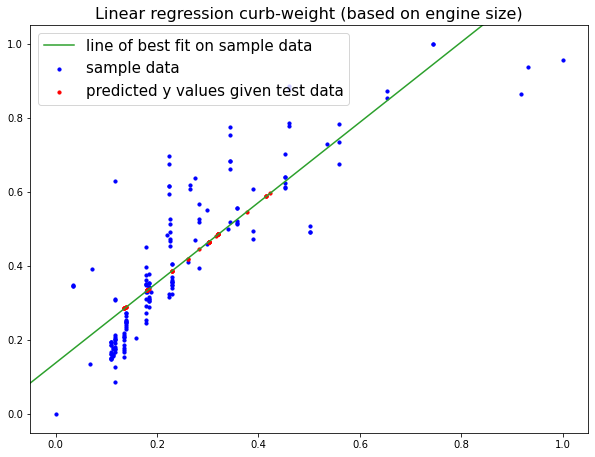

In [688]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
fig.set_size_inches(10,7.5)

ax1.scatter(x_train, y_train, s=10, c='b', marker="o", label='sample data')
ax1.scatter(x_test,y_pred, s=10, c='r', marker="o", label='predicted y values given test data')
ax1.axline(xy1=(0, b), slope=m, color='tab:green', label='line of best fit on sample data')
plt.legend(loc='upper left',fontsize='15')
plt.title('Linear regression curb-weight (based on engine size)',size='16')
plt.show()

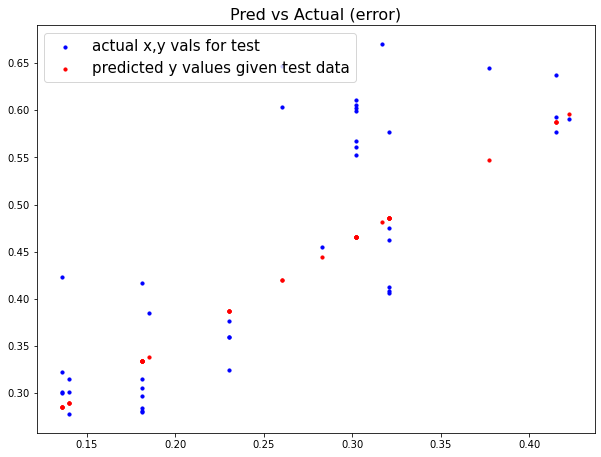

Error [[3.35646652e-06 3.47180802e-06 1.58687405e-05 ... 2.21992787e-03
  3.54440348e-03 2.51452924e-03]
 [3.35646652e-06 3.47180802e-06 1.58687405e-05 ... 2.21992787e-03
  3.54440348e-03 2.51452924e-03]
 [3.35646652e-06 3.47180802e-06 1.58687405e-05 ... 2.21992787e-03
  3.54440348e-03 2.51452924e-03]
 ...
 [2.46900904e-03 2.11542770e-03 1.92488392e-03 ... 5.49002845e-07
  1.36371835e-04 5.23505415e-06]
 [1.01267081e-03 7.91136233e-04 6.76356981e-04 ... 2.93289178e-04
  8.72875714e-04 4.06210279e-04]
 [8.56739495e-04 6.54068740e-04 5.50112993e-04 ... 3.87226205e-04
  1.03020756e-03 5.15609457e-04]]


In [689]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
fig.set_size_inches(10,7.5)

ax1.scatter(x_test, y_test, s=10, c='b', marker="o", label='actual x,y vals for test')
ax1.scatter(x_test,y_pred, s=10, c='r', marker="o", label='predicted y values given test data')
# ax1.axline(xy1=(0, b), slope=m, color='tab:green', label='line of best fit on sample data')
plt.legend(loc='upper left',fontsize='15')
plt.title('Pred vs Actual (error)',size='16')
plt.show()
print('Error' ,(y_pred-y_test)**2/len(y_pred))

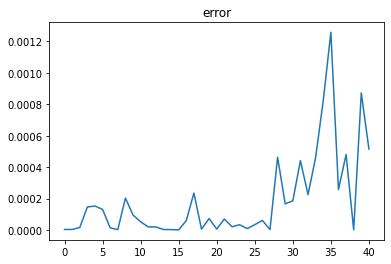

In [690]:
error = (np.array([y_test]).T - y_pred)**2/len(y_pred)
plt.plot(error)

plt.title('error')
plt.show()


## 6. Multiple Regression Model(s) 🔥🔮
**Bulding on information from the EDA step, we find variables which prove to be highly effective for regression**

#### Below, adhering to the DRY principle, we define a function which will make things easier down the line

In [691]:
def r_sq_calculator(x, y):
    train_end_index = test_sizer(cars_df_copy['engine-size'])
    x_train = np.array(x[:train_end_index])
    y_train = np.array(y[:train_end_index])

    x_test = np.array(x[train_end_index:])
    y_test = np.array(y[train_end_index:])
    model = LinearRegression().fit(x_train,y_train)
    r_sq = model.score(x_test, y_test)
#     print(f"coefficient of determination: {r_sq}")
#     print(f"intercept: {model.intercept_}")
#     print(f"slope: {model.coef_}")
    b = model.intercept_
    m = model.coef_
    y_pred = model.intercept_ + model.coef_ * x_test
#     print(f"predicted response:\n{y_pred}")
#     fig = plt.figure()
#     ax1 = fig.add_subplot(111)
#     fig.set_size_inches(10,7.5)
#     print(y_test.shape,y_pred.shape)
#     sns.regplot(x=y_test, y=y_pred, ci=None, color="b")
#     ax1.scatter(x_train, y_train, s=10, c='b', marker="o", label='sample data')
#     ax1.scatter(x_test,y_pred, s=10, c='r', marker="o", label='predicted y values given test data')
    
#     return y_test, y_pred, m, b
    return r_sq, list(x.columns)

**Below, we take a few important variables from the df**

**In the code-cell following this one, we do the same things many times**

**Showing here to add a visual element**

In [692]:
cars_ex_vars_1 = cars_df_copy[['city-mpg', 'engine-size', 'height']]
cars_ex_vars_1

,city-mpg,engine-size,height
0,0.222222,0.260377,0.083333
1,0.166667,0.343396,0.383333
2,0.305556,0.181132,0.541667
3,0.138889,0.283019,0.541667
4,0.166667,0.283019,0.441667
...,...,...,...
199,0.277778,0.301887,0.641667
200,0.166667,0.301887,0.641667
201,0.138889,0.422642,0.641667
202,0.361111,0.316981,0.641667


**Due to the size of our dataset we have the option of trying many different variable combinations to find the variables which offer the highest r-square model score**
(We could possible use this same technique even on a larger dataset, by focusing on a smaller sample)

In [693]:
import itertools
main_vars = ['city-mpg', 'width','length', 'peak-rpm', 'engine-size']
all_combos = []
# get all possible combinations of these variable 
# (all of which are highly correlated with curb-weight)
for i in range(1,len(main_vars)+1):
    all_combos += list(itertools.combinations(main_vars, i))
                       
display(all_combos)

[('city-mpg',),
 ('width',),
 ('length',),
 ('peak-rpm',),
 ('engine-size',),
 ('city-mpg', 'width'),
 ('city-mpg', 'length'),
 ('city-mpg', 'peak-rpm'),
 ('city-mpg', 'engine-size'),
 ('width', 'length'),
 ('width', 'peak-rpm'),
 ('width', 'engine-size'),
 ('length', 'peak-rpm'),
 ('length', 'engine-size'),
 ('peak-rpm', 'engine-size'),
 ('city-mpg', 'width', 'length'),
 ('city-mpg', 'width', 'peak-rpm'),
 ('city-mpg', 'width', 'engine-size'),
 ('city-mpg', 'length', 'peak-rpm'),
 ('city-mpg', 'length', 'engine-size'),
 ('city-mpg', 'peak-rpm', 'engine-size'),
 ('width', 'length', 'peak-rpm'),
 ('width', 'length', 'engine-size'),
 ('width', 'peak-rpm', 'engine-size'),
 ('length', 'peak-rpm', 'engine-size'),
 ('city-mpg', 'width', 'length', 'peak-rpm'),
 ('city-mpg', 'width', 'length', 'engine-size'),
 ('city-mpg', 'width', 'peak-rpm', 'engine-size'),
 ('city-mpg', 'length', 'peak-rpm', 'engine-size'),
 ('width', 'length', 'peak-rpm', 'engine-size'),
 ('city-mpg', 'width', 'length', 'p

In [694]:
all_r_sqrs = []

for combo in all_combos:
    all_r_sqrs.append(r_sq_calculator(cars_df_copy[list(combo)], 
                                     cars_df_copy['curb-weight']))
all_r_sqrs.sort()
display(all_r_sqrs)
best_r_sqr = max(all_r_sqrs)

[(-0.5742301902119424, ['peak-rpm']),
 (0.25221086468569864, ['city-mpg', 'peak-rpm']),
 (0.3669449978265047, ['city-mpg']),
 (0.4569717564287217, ['width', 'peak-rpm']),
 (0.5003578439278757, ['city-mpg', 'peak-rpm', 'engine-size']),
 (0.5023725145160172, ['peak-rpm', 'engine-size']),
 (0.5641941051577479, ['engine-size']),
 (0.5866278336750419, ['city-mpg', 'engine-size']),
 (0.5926150834866124, ['width']),
 (0.5975278467562708, ['city-mpg', 'width', 'peak-rpm']),
 (0.6787316259184516, ['width', 'length', 'peak-rpm']),
 (0.6820785675343759, ['city-mpg', 'width', 'peak-rpm', 'engine-size']),
 (0.6903906915267017, ['width', 'peak-rpm', 'engine-size']),
 (0.7140804770692379, ['width', 'length']),
 (0.7260886138222189, ['length', 'peak-rpm']),
 (0.7286912693687297, ['city-mpg', 'width', 'length', 'peak-rpm']),
 (0.7324795259562573, ['length']),
 (0.7434554584534786, ['city-mpg', 'width']),
 (0.757280528449271, ['width', 'engine-size']),
 (0.7853607963145446, ['city-mpg', 'length', 'peak-

In [695]:
print('''\n\nbest r_sq and respective variables:\n''',best_r_sqr)



best r_sq and respective variables:
 (0.8726413590554893, ['city-mpg', 'length', 'engine-size'])


## 7. K Cross validation 🧪
#### The code I'm using for cross-validation is from https://scikit-learn.org/stable/modules/cross_validation.html

In [731]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn import preprocessing
from sklearn import utils

In [742]:
# cross_val_score will only work with int vals
# new_cars_df = (cars_df_copy*100).astype('int')
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(cars_df_copy['curb-weight'])

In [744]:
X = cars_df_copy[all_r_sqrs[-1][1]]
y = encoded
clf = svm.SVC(kernel='linear', C=1, random_state=42, gamma='auto')
scores = cross_val_score(clf, X, y, cv=3)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.02 accuracy with a standard deviation of 0.01


C:\Users\Wesso\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


In [741]:
X, y = new_cars_df[all_r_sqrs[-2][1]], new_cars_df['curb-weight']
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=3)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.13 accuracy with a standard deviation of 0.02


C:\Users\Wesso\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


#### Note: When I originally converted the numbers to int types, I did `new_cars_df = cars_df_copy.astype('int')` and I actually thought that my k-cross validation score was higher (like 95%). <br> Then I realized that I was actually converting all the normalized #s to 0. It's not too hard to predict 0 with a dataframe full of zeros... By the time I realized my mistake, it was kinda late. <br> And so, here we are with 20% accuracy. 

## Considering the high score for r_sqr, it's likely there's simply something wrong with the way I'm doing the cross validation. Either way, such is the way of coding...